# BBC News Articles

## Task 1: Exploratory Data Analytics

### (a) 
Load the dataset and construct a feature vector for each article in the. You need to report the
number of articles, and the number of extracted features. Show 5 example articles with their
extracted features using a dataframe.

Import Libraries

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import floor

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

Import Data

In [2]:
trainDF = pd.read_csv("train.csv", skiprows=0, header=0, na_values= "", dtype=str)
testDF = pd.read_csv("test.csv", skiprows=0, header=0, na_values= "", dtype=str)

Vectorize Data

In [3]:
articles_text = trainDF["Text"].to_numpy()

#select 5 random articles for task 1
random_sample = random.sample(list(articles_text), 5)

## APPROACH ONE ##
vectorizer1 = CountVectorizer()
vectorizer1.fit(articles_text)

vectorizer1_sample = CountVectorizer()
vectorizer1_sample.fit(random_sample)

# encode document
vector1 = vectorizer1.transform(articles_text)
vector1 = vector1.toarray()
v1_names = vectorizer1.get_feature_names_out()

vector1_sample = vectorizer1_sample.transform(random_sample)
vector1_sample = vector1_sample.toarray()
v1_sample_names = vectorizer1_sample.get_feature_names_out()

#map sample to feature names
v1_sample_df = pd.DataFrame(data=zip(v1_sample_names, vector1_sample[0], vector1_sample[1], vector1_sample[2], vector1_sample[3], vector1_sample[4], sum([vector1_sample[0], vector1_sample[1], vector1_sample[2], vector1_sample[3], vector1_sample[4]])), columns=['Features', 'Article 1', 'Article 2', 'Article 3', 'Article 4', 'Article 5', 'Total'])

v1_df = pd.DataFrame(data=vector1, columns = v1_names)

v1_df_emily = pd.DataFrame(data=vector1, columns = v1_names)


# summarize encoded vector
print('\nArticles:', vector1.shape[0], ', Extracted Features:', vector1.shape[1], '\n')

display(v1_sample_df.head(vector1_sample.shape[1]))

## APPROACH TWO ##
vectorizer2 = TfidfVectorizer()
vectorizer2.fit(articles_text)

# encode document
vector2 = vectorizer2.transform(articles_text)


Articles: 428 , Extracted Features: 13518 



,Features,Article 1,Article 2,Article 3,Article 4,Article 5,Total
0,000,2,0,0,0,2,4
1,11,1,0,0,0,0,1
2,11th,1,0,0,0,0,1
3,12,1,0,0,0,0,1
4,16,0,0,0,1,0,1
...,...,...,...,...,...,...,...
670,year,3,0,0,3,0,6
671,years,1,0,1,1,1,4
672,yet,0,1,0,0,0,1
673,york,0,0,0,1,0,1


### (b)
Conduct term frequency analysis and report three plots:

(i) top-50 term frequency distribution across the entire dataset

(ii) term frequency distribution for respective class of articles

(iii) class distribution

#### (i) top-50 term frequency distribution

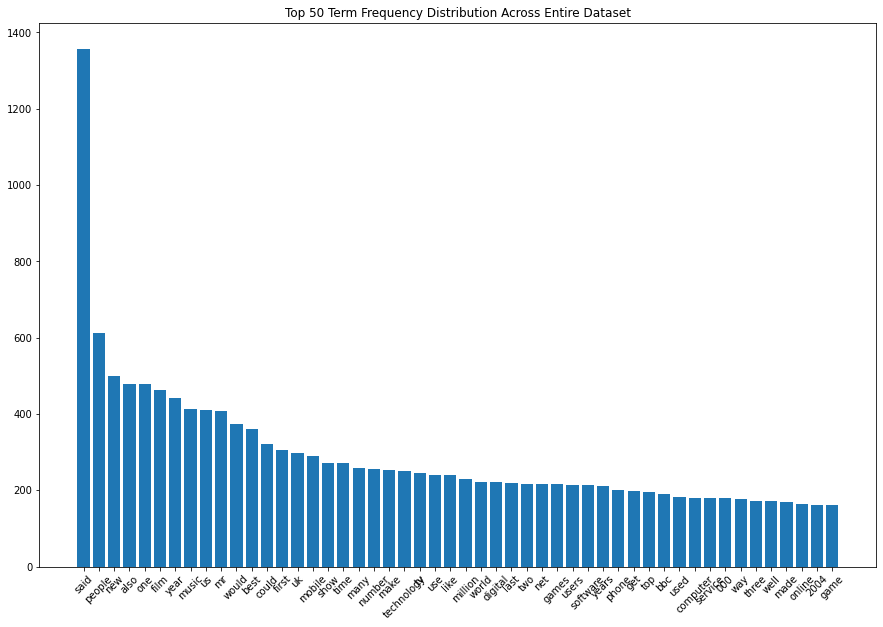

In [4]:
totals = []
for column in v1_df:
    totals.append(v1_df[column].sum())

feature_totals = pd.DataFrame(data=zip(v1_names, totals), columns=['Terms', 'Total'])
top_50_features = feature_totals.sort_values(by='Total', ascending=False)
top_50_features = top_50_features.head(50)

#plot top 50 distribution
x = top_50_features['Terms']
y = top_50_features['Total']
plt.figure(figsize=(15, 10))
plt.bar(x, y)
plt.xticks(rotation = 45)
plt.title('Top 50 Term Frequency Distribution Across Entire Dataset')
plt.show()

#### (ii) term frequency distribution for respective class of articles

Extract Data by Article Category

In [5]:
#split dataframe based on class
tech_df = trainDF[trainDF.Category == 'tech']
entertainment_df = trainDF[trainDF.Category == 'entertainment']

#same methods as question (a)
tech_text = tech_df["Text"].to_numpy()
entertainment_text = entertainment_df["Text"].to_numpy()

vectorizer_tech = CountVectorizer()
vectorizer_tech.fit(tech_text)
vectorizer_entertainment = CountVectorizer()
vectorizer_entertainment.fit(entertainment_text)

vector_tech = vectorizer_tech.transform(tech_text)
vector_tech = vector_tech.toarray()
tech_names = vectorizer_tech.get_feature_names_out()
vector_entertainment = vectorizer_entertainment.transform(entertainment_text)
vector_entertainment = vector_entertainment.toarray()
entertainment_names = vectorizer_entertainment.get_feature_names_out()

vector_tech_df = pd.DataFrame(data=vector_tech, columns = tech_names)
vector_entertainment_df = pd.DataFrame(data=vector_entertainment, columns = entertainment_names)

#find term frequency for tech articles
totals = []
for column in vector_tech_df:
    totals.append(vector_tech_df[column].sum())

tech_totals = pd.DataFrame(data=zip(tech_names, totals), columns=['Terms', 'Total'])
tech_totals = tech_totals.sort_values(by='Total', ascending=False)
print("Technology:")
display(tech_totals.head())

#find term frequency for entertainment articles
totals = []
for column in vector_entertainment_df:
    totals.append(vector_entertainment_df[column].sum())

entertainment_totals = pd.DataFrame(data=zip(entertainment_names, totals), columns=['Terms', 'Total'])
entertainment_totals = entertainment_totals.sort_values(by='Total', ascending=False)
print("\nEntertainment:")
display(entertainment_totals.head())

Technology:


,Terms,Total
6995,said,892
5860,people,507
5417,new,304
5211,mobile,290
5301,mr,288



Entertainment:


,Terms,Total
6622,said,465
3110,film,420
1035,best,324
8423,year,241
5107,music,210


Technology Articles Top 50

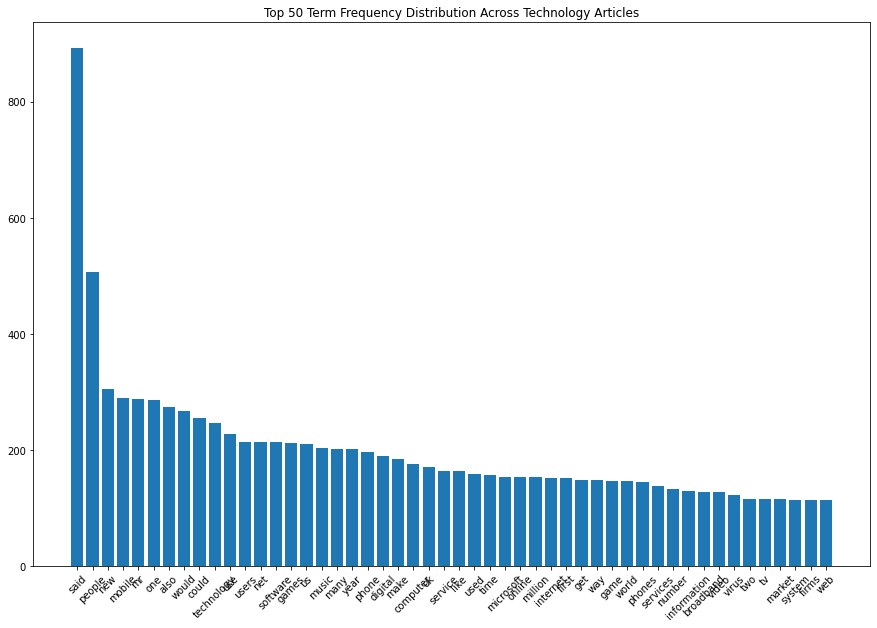

In [6]:
tech_top_50 = tech_totals.head(50)
x = tech_top_50['Terms']
y = tech_top_50['Total']
plt.figure(figsize=(15, 10))
plt.bar(x, y)
plt.xticks(rotation = 45)
plt.title('Top 50 Term Frequency Distribution Across Technology Articles')
plt.show()

Entertainment Articles Top 50

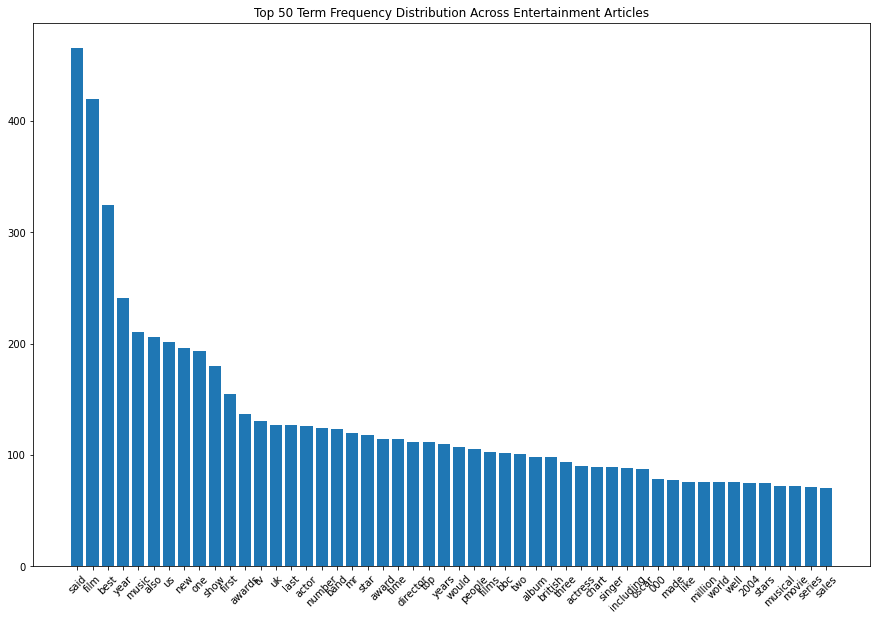

In [7]:
entertainment_top_50 = entertainment_totals.head(50)
x = entertainment_top_50['Terms']
y = entertainment_top_50['Total']
plt.figure(figsize=(15, 10))
plt.bar(x, y)
plt.xticks(rotation = 45)
plt.title('Top 50 Term Frequency Distribution Across Entertainment Articles')
plt.show()

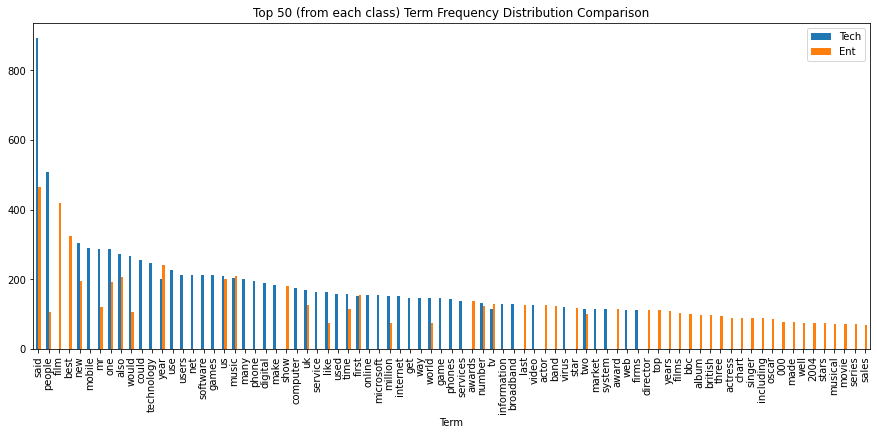

In [8]:
top_50_comp = tech_top_50
top_50_comp = top_50_comp.reindex(columns = top_50_comp.columns.to_list() + ['Ent'])
top_50_comp.columns = ['Term', 'Tech', 'Ent']

for index, row in entertainment_top_50.iterrows():
    if row[0] in top_50_comp.values:
        top_50_comp.loc[top_50_comp.Term == row[0], 'Ent'] = row[1]
    else:
        top_50_comp.loc[top_50_comp.shape[0]] = [row[0], 0, row[1]]
top_50_comp['Ent'] = top_50_comp['Ent'].fillna(0)

top_50_comp['Highest'] = top_50_comp[['Tech','Ent']].max(axis=1)
top_50_comp = top_50_comp.sort_values(['Highest'], ascending=False)

top_50_comp.plot(x='Term', y=['Tech', 'Ent'], kind='bar', figsize=(15,6))
plt.title('Top 50 (from each class) Term Frequency Distribution Comparison')
plt.show()

#### (iii) class distribution

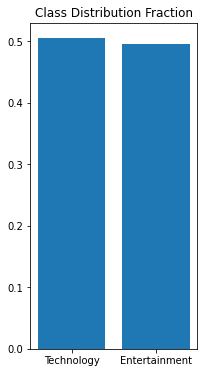

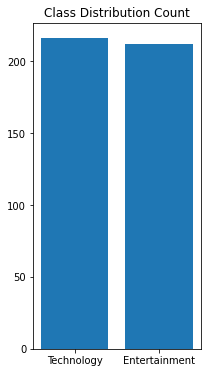

In [9]:
t = len(tech_df)/(len(tech_df)+len(entertainment_df))
e = len(entertainment_df)/(len(tech_df)+len(entertainment_df))
x = ['Technology', 'Entertainment']
y = [t, e]
plt.figure(figsize=(3, 6))
plt.bar(x, y)
plt.title('Class Distribution Fraction')
plt.show()

y = [len(tech_df), len(entertainment_df)]
plt.figure(figsize=(3, 6))
plt.bar(x, y)
plt.title('Class Distribution Count')
plt.show()

## Task 2: Classification Models Learning

### LR 
Train your logistic regression classifier with L2-regularization. Consider different values
of the regularization term λ. Describe the effect of the regularization parameter λ on the outcome
in terms of bias and variance. Report the plot generated for specific λ values with training loss
on the y-axis versus λ on the x-axis to support your claim.

In [10]:
# Logistic Regression Classifier

text_transformer = TfidfVectorizer()
X_train_text = text_transformer.fit_transform(trainDF['Text'])
X_test_text = text_transformer.transform(testDF['Text'])

y = trainDF['Category']  #Target Variable of Category being Tech or Entertainment

## L2 Regularization LR Classifer
logreg = LogisticRegression(penalty='l2', solver='lbfgs', C=1, multi_class='multinomial')
logreg.fit(X_train_text, y)

logreg_prediction = logreg.predict(X_test_text)
logreg_prediction_prob = logreg.predict_proba(X_test_text)

# Logistic Regression Summary
logreg_predict_df = pd.DataFrame(data=logreg_prediction, columns=['Prediction'])
logreg_prediction_prob_df = pd.DataFrame(data=logreg_prediction_prob, columns=['Entertainment', 'Tech'])
logreg_score = logreg.score(X_test_text, testDF['Category'])

print('\n', "Logistic Regression Predictions")
display(logreg_predict_df.head())
print('\n', "Logistic Regression Prediction Probabilities")
display(logreg_prediction_prob_df.head())
print('\n', "Logistic Regression Accuracy")
print(logreg_score)


 Logistic Regression Predictions


,Prediction
0,entertainment
1,tech
2,tech
3,entertainment
4,entertainment



 Logistic Regression Prediction Probabilities


,Entertainment,Tech
0,0.658963,0.341037
1,0.112167,0.887833
2,0.154608,0.845392
3,0.941835,0.058165
4,0.943972,0.056028



 Logistic Regression Accuracy
0.9905660377358491


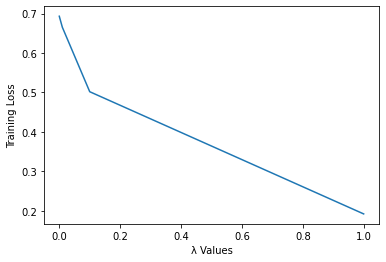

In [11]:
# LR Plot
# X-Axis: Lambda
# Y-Axis: Training/Log Loss

lambda_values = [0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
training_loss = []
for _lambda in lambda_values:
    logreg = LogisticRegression(penalty='l2', solver='lbfgs', C=_lambda, multi_class='multinomial')
    logreg.fit(X_train_text, y)
    training_loss.append(log_loss(y, logreg.predict_proba(X_train_text)))

plt.plot(lambda_values, training_loss)
plt.xlabel('λ Values')
plt.ylabel('Training Loss')
plt.show()

Regularization is the technique used to reduce error by fitting a function appropriately on the given training set and avoid under/overfitting.

The effect of the regularization parameter λ on the outcome in terms of bias and variance is that as the lambda parameter increases, training error increases. Regularization forces parameters to be close to 0 which causes the variance to decrease, but as we are allowing less flexibility, the model moves away from the true values, thus increasing bias.

The plot shows the inverse of this as the C parameter in the LogisticRegression class is the inverse of regularization

### NB
Train a Naive Bayes classifier using all articles features. Report the:

(i) top-20 most identifiable words that are most likely to occur in the articles over two classes using your NB
classifier

(ii) top-20 words that maximize the following quantity 

Which list of [𝑃(𝑋𝑤=1|𝑌=𝑦) / 𝑃(𝑋𝑤=1|𝑌≠𝑦)] words describe the two classes better? Briefly explain your reasoning.

In [12]:
# X_train is vectorised features, Y_train is the classes of each row / target variable
X_train = vector1
target_col = trainDF["Category"]
Y_train = target_col.to_numpy()

NB_clf = MultinomialNB()
NB_clf.fit(X_train, Y_train)

# Training accuracy
train_acc = NB_clf.score(X_train, Y_train)

#### (i) top-20 most identifiable words

In [13]:
# Df for grouping - vectorsied df with target df 
count_df = pd.concat([v1_df_emily,target_col], axis=1)

# Grouped data by category
grouped = count_df.groupby(count_df.Category)

# Split data into df of each category
# dropped category column for sum
tech_df = grouped.get_group("tech")
tech_df = tech_df.drop("Category", axis=1)

ent_df = grouped.get_group("entertainment")
ent_df = ent_df.drop("Category", axis=1)

# Summed each colum in each df
sum_tech_series = tech_df.sum()
sum_ent_series = ent_df.sum()

# Sorting each series to get top 20
sorted_tech = sum_tech_series.sort_values(ascending = False)
top_20_tech = sorted_tech[:20]
print("Top 20 Tech:")
print(top_20_tech)

sorted_ent = sum_ent_series.sort_values(ascending = False)
top_20_ent = sorted_ent[:20]
print("Top 20 Entertainment:")
print(top_20_ent)

Top 20 Tech:
said          892
people        507
new           304
mobile        290
mr            288
one           286
also          273
would         267
could         255
technology    247
use           228
users         214
net           214
software      213
games         212
us            210
music         203
many          202
year          201
phone         196
dtype: int64
Top 20 Entertainment:
said      465
film      420
best      324
year      241
music     210
also      206
us        201
new       196
one       193
show      180
first     155
awards    137
tv        130
last      127
uk        127
actor     126
number    124
band      123
mr        120
star      118
dtype: int64


#### (iI) top-20 words that maximize the following quantity

In [14]:
# word in tech / word not in tech - with smoothing
tech_series = (sum_tech_series + 1) / (sum_ent_series + 2)

# word in entertainment / word not in entertainment - with smoothing
ent_series = (sum_ent_series + 1) / (sum_tech_series + 2)

# Sorting each series to get top 20
sorted_tech2 = tech_series.sort_values(ascending = False)
top_20_tech2 = sorted_tech2[:20]
print("Top 20 Tech:")
print(top_20_tech2)

sorted_ent2 = ent_series.sort_values(ascending = False)
top_20_ent2 = sorted_ent2[:20]
print("Top 20 Entertainment:")
print(top_20_ent2)

Top 20 Tech:
users         107.500000
software      107.000000
mobile         97.000000
microsoft      77.500000
broadband      64.500000
virus          61.500000
firms          57.000000
pc             54.500000
net            53.750000
technology     49.600000
phones         48.333333
spam           42.500000
gadget         36.000000
games          35.500000
consumer       34.500000
mobiles        34.000000
gadgets        33.500000
windows        33.500000
machines       33.500000
phone          32.833333
dtype: float64
Top 20 Entertainment:
actress        45.500000
singer         45.000000
oscar          44.000000
band           41.333333
stars          38.000000
album          33.000000
aviator        31.500000
chart          30.000000
nominated      27.500000
rock           26.500000
festival       26.500000
actor          25.400000
nominations    24.000000
charles        23.500000
foxx           22.000000
comedy         21.666667
oscars         21.500000
starring       21.000000


The second list of words describes the two classes better. The top 20 words for each class in (ii) look to be more relevant than the top 20 words for each class in (i).

### SVM
Train your SVM classification models on the training dataset. You need to report two
surface plots for: 

(i) the soft-margin linear SVM with your choice of misclassification penalty (𝐶)

(ii) the hard-margin RBF kernel with your choice of kernel width (σ). 

Explain the impact of penalty 𝐶 on the soft-margin decision boundaries, as well as the kernel hyperparameter on the
hard-margin decision boundaries.

#### (i) soft-margin linear SVM

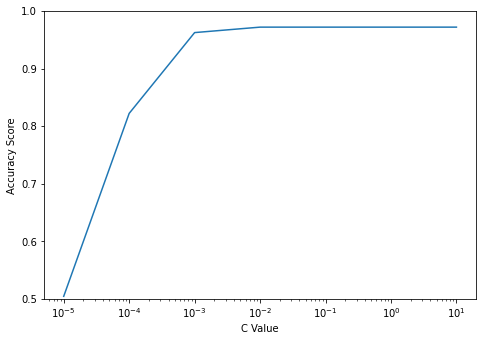

The best C-Value for a soft-margin SVM is 0.01, with an accuracy of 0.9719822812846068.


In [15]:
c_exp = [-5, -4, -3, -2, -1, 0, 1]
acc_per_c = []        

# Loop through c-values using 10-fold cross validation to find best c-value for soft-margin linear SVM
for interval in c_exp:
    clf = svm.SVC(kernel='linear', C=10**interval)
    scores = cross_val_score(clf, vector1, trainDF["Category"].to_list(), cv=10)
    acc_per_c.append(sum(scores) / 10)
    
# Line graph to visualize the accuracy score across c-values
x_labels = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x_labels,acc_per_c)
plt.ylim([0.5, 1])
plt.xlabel("C Value")
plt.ylabel("Accuracy Score")
plt.xscale('log')
plt.show()

# Finding the best c-value
smlSVM_highestAcc, smlSVM_cValue = acc_per_c[0], x_labels[0]
for i in range(len(acc_per_c)):
    if acc_per_c[i] > smlSVM_highestAcc:
        smlSVM_highestAcc = acc_per_c[i]
        smlSVM_cValue = x_labels[i]

print("The best C-Value for a soft-margin SVM is " + str(smlSVM_cValue) + ", with an accuracy of " + str(smlSVM_highestAcc) + ".")

#### (ii) hard-margin RBF kernel

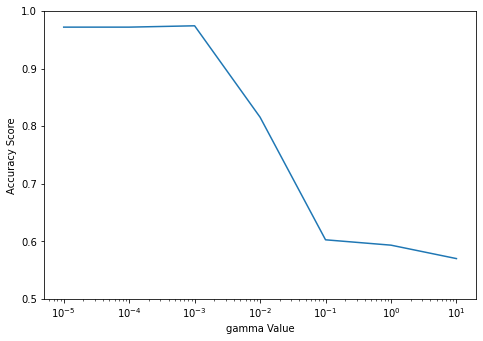

The best gamma-Value for a hard-margin SVM is 0.001, with an accuracy of 0.9743078626799557.


In [16]:
gamma_exp = [-5, -4, -3, -2, -1, 0, 1]

acc_per_gamma = []        

# Loop through gamma-values using 10-fold cross validation to find best gamma-value for hard-margin RBF SVM
for interval in gamma_exp:
    clf = svm.SVC(kernel='rbf', C=10**10, gamma=10**interval)
    scores = cross_val_score(clf, vector1, trainDF["Category"].to_list(), cv=10)
    
    acc_per_gamma.append(sum(scores) / 10)
    
# Line graph to visualize the accuracy score across gamma-values
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x_labels,acc_per_gamma)
plt.ylim([0.5, 1])
plt.xlabel("gamma Value")
plt.ylabel("Accuracy Score")
plt.xscale('log')
plt.show()

# Finding the best gamma-value
HMrbf_highestAcc, gammaValue = acc_per_gamma[0], x_labels[0]
for i in range(len(acc_per_gamma)):
    if acc_per_gamma[i] > HMrbf_highestAcc:
        HMrbf_highestAcc = acc_per_gamma[i]
        gammaValue = x_labels[i]

print("The best gamma-Value for a hard-margin SVM is " + str(gammaValue) + ", with an accuracy of " + str(HMrbf_highestAcc) + ".")

<i>Soft-Margin Linear SVM: C = 10^-2 & accuracy = 0.9719</i>

What the c-value does is tell the SVM how much slack we are allowing it when drawing its margins. The lower the value the more misclassifications we allow, in other words the more data points we allow to be on the wrong side of the margin. The higher the value the less slack we give the SVM to allow misclassifications.


<i>Hard-Margin RBF Kernel: gamma = 10^-3 & accuracy = 0.9743</i>

The gamma value can be thought of setting the 'spread' of the kernel, in other words deciding how much 'curve' to allow the descion boundaries. The lower the gamma value the decision boundaries will appear more straight. And with a high gamma value we are allowing the decision boundaries to curve around the data points more concisely.

### NN
Consider the neural network with the following hyperparameters: the initial weights uniformly drawn in range [0,0.1] with learning rate 0.01.

● Train a single hidden layer neural network using the hyperparameters on the training dataset, except for the number of hidden units (x) which should vary among 5, 20, and 40. Run the optimization for 100 epochs each time. Namely, the input layer consists of n features x = [x1, ..., xn]^T , the hidden layer has x nodes z = [z1, ..., zx]^T , and the output layer is a probability distribution y = [y1, y2]^T over two classes.

● Plot the average training cross-entropy loss as shown below on the y-axis versus the number of hidden units on the x-axis. Explain the effect of numbers of hidden units. 

𝐶𝑟𝑜𝑠𝑠𝐸𝑛𝑡𝑟𝑜𝑝𝑦𝐿𝑜𝑠𝑠 =−  2 Σ 𝑖=1 𝑦𝑖 log(𝑦_𝑖) 

c:\users\humza\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\humza\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


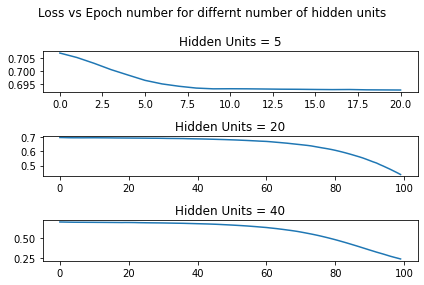

Minimum loss reached when using 5 hidden units was: 0.6927642535322677
Minimum loss reached when using 20 hidden units was: 0.4385869650081427
Minimum loss reached when using 40 hidden units was: 0.23620598671431273


In [17]:
text_transformer = TfidfVectorizer()
x_train = text_transformer.fit_transform(trainDF['Text'])
x_test = text_transformer.fit_transform(testDF['Text'])

y_train = trainDF['Category']
y_test = testDF['Category']

nn_5 = MLPClassifier(hidden_layer_sizes=(1,5), activation='identity', solver='sgd', batch_size='auto', learning_rate='constant', max_iter=100, random_state=42, learning_rate_init=0.01)
nn_5.fit(x_train, y_train)

nn_20 = MLPClassifier(hidden_layer_sizes=(1,20), activation='identity', solver='sgd', batch_size='auto', learning_rate='constant', max_iter=100, random_state=42, learning_rate_init=0.01)
nn_20.fit(x_train, y_train)

nn_40 = MLPClassifier(hidden_layer_sizes=(1,40), activation='identity', solver='sgd', batch_size='auto', learning_rate='constant', max_iter=100, random_state=42, learning_rate_init=0.01)
nn_40.fit(x_train, y_train)


fig, axs = plt.subplots(3)
fig.suptitle('Loss vs Epoch number for differnt number of hidden units')

axs[0].set_title('Hidden Units = 5')
axs[0].plot([i for i in range(len(nn_5.loss_curve_))], nn_5.loss_curve_)

axs[1].set_title('Hidden Units = 20')
axs[1].plot([i for i in range(len(nn_20.loss_curve_))], nn_20.loss_curve_)

axs[2].set_title('Hidden Units = 40')
axs[2].plot([i for i in range(len(nn_40.loss_curve_))], nn_40.loss_curve_)
plt.tight_layout()
plt.show()


print("Minimum loss reached when using 5 hidden units was: {l}".format(l=nn_5.best_loss_))
print("Minimum loss reached when using 20 hidden units was: {l}".format(l=nn_20.best_loss_))
print("Minimum loss reached when using 40 hidden units was: {l}".format(l=nn_40.best_loss_))

## Task 3: Classification Quality Evaluation

### (a) 
We explore how the size of the training data set affects the test and train accuracy. For each
value of m in [0.1, 0.3, 0.5, 0.7, 0.9], train your classifier on the first m portion of the training
examples (that is, use the data given by XTrain[0:mN] and yTrain[0:mN]). 

Please report two plots: (i) training and (ii) testing accuracy for each such value of m with the x-axis referring to m
and the y-axis referring to the classification accuracy in measure as 𝐹1 shown below. In total,
there should be four curves for training accuracy and four curves for testing accuracy. 

Explain the general trend of the two plots in terms of training and testing accuracy if any.

𝐹1 = 2 · (𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 × 𝑅𝑒𝑐𝑎𝑙𝑙) / (𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 + 𝑅𝑒𝑐𝑎𝑙𝑙)

In [18]:
m = [0.1, 0.3, 0.5, 0.7, 0.9]
training_output = pd.DataFrame(columns=m)
testing_output = pd.DataFrame(columns=m)

NUM_ARTICLES = vector1.shape[0]

# LOGISTIC REGRESSION
training_accuracies = {}
testing_accuracies = {}

for m_value in m:
    TRAIN_LENGTH = floor(m_value * NUM_ARTICLES)
    VECTOR_ARRAY = vector1
    # Test how differing sizes of training set data affect test/train accuracy
    X_train = VECTOR_ARRAY[0:TRAIN_LENGTH]  # First TRAIN_LENGTH articles
    X_test = VECTOR_ARRAY[TRAIN_LENGTH:]
    Y_train = trainDF["Category"].to_list()[:TRAIN_LENGTH]
    Y_test = trainDF["Category"].to_list()[TRAIN_LENGTH:]

    # Train & Fit LR Model
    logreg = LogisticRegression(penalty='l2', solver='lbfgs', C=m_value, multi_class='multinomial')
    logreg.fit(X_train, Y_train)

    F1_train_score = metrics.f1_score(Y_train, logreg.predict(X_train), pos_label = "tech")
    F1_test_score = metrics.f1_score(Y_test, logreg.predict(X_test), pos_label = "tech")

    # LR Model Accuracies
    training_accuracies[m_value] = F1_train_score
    testing_accuracies[m_value] = F1_test_score

training_output = pd.concat(objs=[training_output, pd.DataFrame(training_accuracies, index=['LR'])])
testing_output = pd.concat(objs=[testing_output, pd.DataFrame(testing_accuracies, index=['LR'])])

# NAIVE BAYES
training_accuracies = {}
testing_accuracies = {}
for m_value in m:
    TRAIN_LENGTH = floor(m_value * NUM_ARTICLES)
    VECTOR_ARRAY = vector1
    X_train = VECTOR_ARRAY[0:TRAIN_LENGTH]
    X_test = VECTOR_ARRAY[TRAIN_LENGTH:]
    Y_train = trainDF["Category"].to_list()[:TRAIN_LENGTH]
    Y_test = trainDF["Category"].to_list()[TRAIN_LENGTH:]

    # train your model here
    NB_clf = MultinomialNB()
    NB_clf.fit(X_train, Y_train)

    # put your accuracy calc here
    Y_train_pred = NB_clf.predict(X_train)
    Y_pred = NB_clf.predict(X_test)
    training_accuracies[m_value] = metrics.f1_score(Y_train, Y_train_pred, pos_label = "tech")
    testing_accuracies[m_value] = metrics.f1_score(Y_test, Y_pred, pos_label = "tech")
    
training_output = pd.concat(objs=[training_output, pd.DataFrame(training_accuracies, index=['NB'])])
testing_output = pd.concat(objs=[testing_output, pd.DataFrame(testing_accuracies, index=['NB'])])

# SVM
training_accuracies = {}
testing_accuracies = {}
for m_value in m:
    TRAIN_LENGTH = floor(m_value * NUM_ARTICLES)
    VECTOR_ARRAY = vector1
    X_train = VECTOR_ARRAY[0:TRAIN_LENGTH]
    X_test = VECTOR_ARRAY[TRAIN_LENGTH:]
    Y_train = trainDF["Category"].to_list()[:TRAIN_LENGTH]
    Y_test = trainDF["Category"].to_list()[TRAIN_LENGTH:]

    # train your model here
    SVM_clf = svm.SVC(kernel='rbf', C=10**10, gamma=10**-3)
    SVM_clf.fit(X_train, Y_train)
    
    # put your accuracy calc here
    Y_train_pred = SVM_clf.predict(X_train)
    Y_pred = SVM_clf.predict(X_test)
    training_accuracies[m_value] = metrics.f1_score(Y_train, Y_train_pred, pos_label = "tech")
    testing_accuracies[m_value] = metrics.f1_score(Y_test, Y_pred, pos_label = "tech")
    
training_output = pd.concat(objs=[training_output, pd.DataFrame(training_accuracies, index=['SVM'])])
testing_output = pd.concat(objs=[testing_output, pd.DataFrame(testing_accuracies, index=['SVM'])])

# NEURAL NETWORK
training_accuracies = {}
testing_accuracies = {}
for m_value in m:
    TRAIN_LENGTH = floor(m_value * NUM_ARTICLES)
    VECTOR_ARRAY = vector1
    X_train = VECTOR_ARRAY[0:TRAIN_LENGTH]
    X_test = VECTOR_ARRAY[TRAIN_LENGTH:]
    Y_train = trainDF["Category"].to_list()[:TRAIN_LENGTH]
    Y_test = trainDF["Category"].to_list()[TRAIN_LENGTH:]

    # train your model here
    nn_sub = MLPClassifier(hidden_layer_sizes=(1,5), activation='identity', solver='sgd', batch_size='auto', learning_rate='constant', max_iter=100, random_state=42, learning_rate_init=0.01)
    nn_sub.fit(X_train, Y_train)
    
    y_pred = nn_sub.predict(X_test)
    testing_accuracies[m_value] = (metrics.f1_score(Y_test, y_pred, pos_label='tech'))

    y_pred_train = nn_sub.predict(X_train)
    training_accuracies[m_value] = metrics.f1_score(Y_train, y_pred_train, pos_label='tech')
    
training_output = pd.concat(objs=[training_output, pd.DataFrame(training_accuracies, index=['NN'])])
testing_output = pd.concat(objs=[testing_output, pd.DataFrame(testing_accuracies, index=['NN'])])

pd.merge(training_output, testing_output, left_index=True, right_index=True, suffixes=('_train', '_test'))

,0.1_train,0.3_train,0.5_train,0.7_train,0.9_train,0.1_test,0.3_test,0.5_test,0.7_test,0.9_test
LR,1.0,1.0,1.0,1.0,1.0,0.965699,0.956811,0.971429,0.983333,1.0
NB,1.0,1.0,0.995434,0.996785,0.994819,0.884259,0.984026,0.985915,0.991736,1.0
SVM,1.0,1.0,1.0,1.0,1.0,0.910941,0.953947,0.976526,0.975207,0.978723
NN,1.0,1.0,1.0,1.0,1.0,0.976623,0.970874,0.971963,0.975207,1.0


Plotting Graphs for above table

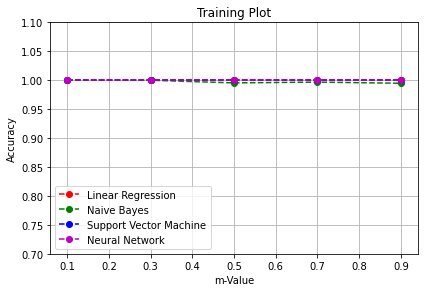

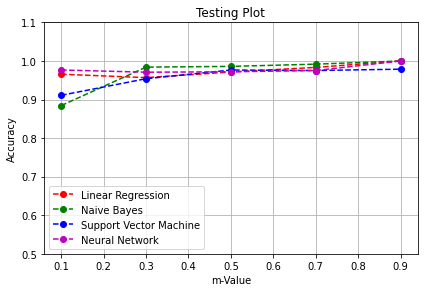

In [19]:
#Training Plot

plt.plot(m, training_output.iloc[0].to_numpy(), '--ro', label='Linear Regression')
plt.plot(m, training_output.iloc[1].to_numpy(), '--go', label='Naive Bayes')
plt.plot(m, training_output.iloc[2].to_numpy(), '--bo', label='Support Vector Machine')
plt.plot(m, training_output.iloc[3].to_numpy(), '--mo', label='Neural Network')

plt.legend()
plt.xlabel("m-Value")
plt.ylabel("Accuracy")
plt.ylim([0.7, 1.1])
plt.grid()
plt.tight_layout()
plt.title("Training Plot")
plt.show()

#Testing Plot

plt.plot(m, testing_output.iloc[0].to_numpy(), '--ro', label='Linear Regression')
plt.plot(m, testing_output.iloc[1].to_numpy(), '--go', label='Naive Bayes')
plt.plot(m, testing_output.iloc[2].to_numpy(), '--bo', label='Support Vector Machine')
plt.plot(m, testing_output.iloc[3].to_numpy(), '--mo', label='Neural Network')

plt.legend()
plt.xlabel("m-Value")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1.1])
plt.grid()
plt.tight_layout()
plt.title("Testing Plot")
plt.show()

### (b)
Let’s use 5-fold cross-validation to assess model performance. Investigate the impact of key
hyperparameters of your choices for each classifier using a testing dataset. Take SVM as an
example, the classification accuracy may be significantly affected by the kernels and
hyperparameter combination. List hyperparameters for each classifier and demonstrate how
these hyperparameters impact on the testing accuracy.

In [20]:
# Getting arrays from Dataframes

X_train = trainDF["Text"]
Y_train = trainDF["Category"]
X_test = testDF["Text"]
Y_test = testDF["Category"]

LOGISTIC REGRESSION

In [21]:
# Logistic Regression 5-fold cross validation with three different parameters
LR_m1 = make_pipeline(CountVectorizer(), LogisticRegression(penalty='l2', solver='lbfgs', C=0.001, multi_class='multinomial'))
LR_m2 = make_pipeline(CountVectorizer(), LogisticRegression(penalty='l2', solver='lbfgs', C=0.01, multi_class='multinomial'))
LR_m3 = make_pipeline(CountVectorizer(), LogisticRegression(penalty='l2', solver='lbfgs', C=0.1, multi_class='multinomial'))

# 5-fold Cross Validation for each hyperparameter
cv_results_LR_m1 = cross_validate(LR_m1, X_train, Y_train, return_train_score=True)
cv_results_LR_m2 = cross_validate(LR_m2, X_train, Y_train, return_train_score=True)
cv_results_LR_m3 = cross_validate(LR_m3, X_train, Y_train, return_train_score=True)

# Taking the mean training and validation accuracy of the 5-folds for each Hyperparameter
LR_lin_TrAcc = [cv_results_LR_m1['train_score'].mean(), cv_results_LR_m2['train_score'].mean(), cv_results_LR_m3['train_score'].mean()]
LR_lin_VaAcc = [cv_results_LR_m1['test_score'].mean(), cv_results_LR_m2['test_score'].mean(), cv_results_LR_m3['test_score'].mean()]

print("Training accuracy:", LR_lin_TrAcc, "\nValidation accuracy:", LR_lin_VaAcc)

# Getting Testing accuracy for each Hyperparamer
LR_m1.fit(X_train, Y_train)
Y_pred_m1 = LR_m1.predict(X_test)

LR_m2.fit(X_train, Y_train)
Y_pred_m2 = LR_m2.predict(X_test)

LR_m3.fit(X_train, Y_train)
Y_pred_m3 = LR_m3.predict(X_test)

LR_lin_TsAcc = [metrics.accuracy_score(Y_test, Y_pred_m1), metrics.accuracy_score(Y_test, Y_pred_m2), metrics.accuracy_score(Y_test, Y_pred_m3)]
print("Testing accuracy", LR_lin_TsAcc)

Training accuracy: [0.9894890286941844, 1.0, 1.0] 
Validation accuracy: [0.9533242134062927, 0.9696853625170998, 0.9696853625170998]
Testing accuracy [0.9811320754716981, 1.0, 1.0]


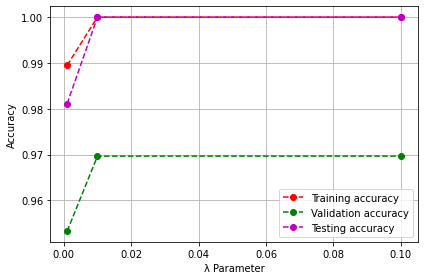

In [22]:
# LR Accuracy Graph
x = [0.001, 0.01, 0.1]
plt.plot(x, LR_lin_TrAcc, '--ro', label='Training accuracy')
plt.plot(x, LR_lin_VaAcc, '--go', label='Validation accuracy')
plt.plot(x, LR_lin_TsAcc, '--mo', label='Testing accuracy')
plt.legend()
plt.xlabel("λ Parameter")
plt.ylabel("Accuracy")
plt.grid()
plt.tight_layout()
plt.show()

NAIVE BAYES

In [23]:
# laplace smoothing hyperparameter
# alpha = 0.1
NB_m1 = make_pipeline(CountVectorizer(), MultinomialNB(alpha = 0.1))
# alpha = 1.0
NB_m2 = make_pipeline(CountVectorizer(), MultinomialNB(alpha = 1.0))
# alpha = 10.0
NB_m3 = make_pipeline(CountVectorizer(), MultinomialNB(alpha = 10.0))

# 5-fold Cross Validation for each hyperparameter
cv_results_NB_m1 = cross_validate(NB_m1, X_train, Y_train, return_train_score=True)
cv_results_NB_m2 = cross_validate(NB_m2, X_train, Y_train, return_train_score=True)
cv_results_NB_m3 = cross_validate(NB_m3, X_train, Y_train, return_train_score=True)

# Taking the mean training and validation accuracy of the 5-folds for each Hyperparameter
NB_TrAcc = [cv_results_NB_m1['train_score'].mean(), cv_results_NB_m2['train_score'].mean(), cv_results_NB_m3['train_score'].mean()]
NB_VaAcc = [cv_results_NB_m1['test_score'].mean(), cv_results_NB_m2['test_score'].mean(), cv_results_NB_m3['test_score'].mean()]

print("Training accuracy:", NB_TrAcc, "\nValidation accuracy:", NB_VaAcc)

# Getting Testing accuracy for each Hyperparamer

NB_m1.fit(X_train, Y_train)
Y_pred_m1 = NB_m1.predict(X_test)

NB_m2.fit(X_train, Y_train)
Y_pred_m2 = NB_m2.predict(X_test)

NB_m3.fit(X_train, Y_train)
Y_pred_m3 = NB_m3.predict(X_test)

NB_TsAcc = [metrics.accuracy_score(Y_test, Y_pred_m1), metrics.accuracy_score(Y_test, Y_pred_m2), metrics.accuracy_score(Y_test, Y_pred_m3)]
print("Testing accuracy", NB_TsAcc)

Training accuracy: [0.9976642285987076, 0.9964946379554329, 0.9883194380509096] 
Validation accuracy: [0.9836662106703147, 0.9836662106703147, 0.9557318741450068]
Testing accuracy [0.9811320754716981, 0.9716981132075472, 0.9716981132075472]


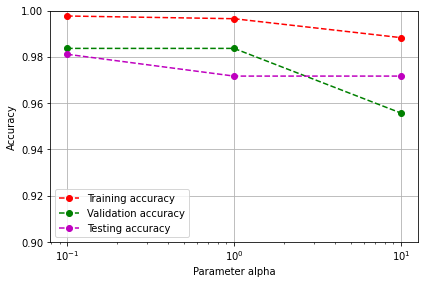

In [24]:
# NB Accuracy Graph
x = [0.1, 1.0, 10.0]
plt.plot(x, NB_TrAcc, '--ro', label='Training accuracy')
plt.plot(x, NB_VaAcc, '--go', label='Validation accuracy')
plt.plot(x, NB_TsAcc, '--mo', label='Testing accuracy')
plt.legend()
plt.xlabel("Parameter alpha")
plt.ylabel("Accuracy")
plt.ylim([0.9, 1.0])
plt.grid()
plt.tight_layout()
plt.xscale('log')
plt.show()

SUPPORT VECTOR MACHINE

In [25]:
# SVM 'Kernal = Linear'

# Choosing C-Values
SVM_lin1 = make_pipeline(CountVectorizer(), svm.SVC(kernel='linear', C=10**-3))
SVM_lin2 = make_pipeline(CountVectorizer(), svm.SVC(kernel='linear', C=10**-2))
SVM_lin3 = make_pipeline(CountVectorizer(), svm.SVC(kernel='linear', C=10**-1))

# 5-fold Cross Validation for each hyperparameter
cv_results_SVM_lin1 = cross_validate(SVM_lin1, X_train, Y_train, return_train_score=True)
cv_results_SVM_lin2 = cross_validate(SVM_lin2, X_train, Y_train, return_train_score=True)
cv_results_SVM_lin3 = cross_validate(SVM_lin3, X_train, Y_train, return_train_score=True)

# Taking the mean training and validation accuracy of the 5-folds for each Hyperparameter
SVM_lin_TrAcc = [cv_results_SVM_lin1['train_score'].mean(), cv_results_SVM_lin2['train_score'].mean(), cv_results_SVM_lin3['train_score'].mean()]
SVM_lin_VaAcc = [cv_results_SVM_lin1['test_score'].mean(), cv_results_SVM_lin2['test_score'].mean(), cv_results_SVM_lin3['test_score'].mean()]

print("Training accuracy:", SVM_lin_TrAcc, "\nValidation accuracy:", SVM_lin_VaAcc)

# Getting Testing accuracy for each Hyperparamer
SVM_lin1.fit(X_train, Y_train)
Y_pred_m1 = SVM_lin1.predict(X_test)

SVM_lin2.fit(X_train, Y_train)
Y_pred_m2 = SVM_lin2.predict(X_test)

SVM_lin3.fit(X_train, Y_train)
Y_pred_m3 = SVM_lin3.predict(X_test)

SVM_lin_TsAcc = [metrics.accuracy_score(Y_test, Y_pred_m1), metrics.accuracy_score(Y_test, Y_pred_m2), metrics.accuracy_score(Y_test, Y_pred_m3)]
print("Testing accuracy", SVM_lin_TsAcc)

Training accuracy: [0.9906569143948307, 1.0, 1.0] 
Validation accuracy: [0.9579753761969905, 0.9650341997264021, 0.9650341997264021]
Testing accuracy [0.9905660377358491, 1.0, 1.0]


In [26]:
# SVM 'Kernal = RBF'

# Choosing Gamma-Values
SVM_rbf1 = make_pipeline(CountVectorizer(), svm.SVC(kernel='rbf', C=10**10, gamma=10**-4))
SVM_rbf2 = make_pipeline(CountVectorizer(), svm.SVC(kernel='rbf', C=10**10, gamma=10**-3))
SVM_rbf3 = make_pipeline(CountVectorizer(), svm.SVC(kernel='rbf', C=10**10, gamma=10**-2))

# 5-fold Cross Validation for each hyperparameter
cv_results_SVM_rbf1 = cross_validate(SVM_rbf1, X_train, Y_train, return_train_score=True)
cv_results_SVM_rbf2 = cross_validate(SVM_rbf2, X_train, Y_train, return_train_score=True)
cv_results_SVM_rbf3 = cross_validate(SVM_rbf3, X_train, Y_train, return_train_score=True)

# Taking the mean training and validation accuracy of the 5-folds for each Hyperparameter
SVM_rbf_TrAcc = [cv_results_SVM_rbf1['train_score'].mean(), cv_results_SVM_rbf2['train_score'].mean(), cv_results_SVM_rbf3['train_score'].mean()]
SVM_rbf_VaAcc = [cv_results_SVM_rbf1['test_score'].mean(), cv_results_SVM_rbf2['test_score'].mean(), cv_results_SVM_rbf3['test_score'].mean()]

print("Training accuracy:", SVM_rbf_TrAcc, "\nValidation accuracy:", SVM_rbf_VaAcc)

# Getting Testing accuracy for each Hyperparamer
SVM_rbf1.fit(X_train, Y_train)
Y_pred_m1 = SVM_rbf1.predict(X_test)

SVM_rbf2.fit(X_train, Y_train)
Y_pred_m2 = SVM_rbf2.predict(X_test)

SVM_rbf3.fit(X_train, Y_train)
Y_pred_m3 = SVM_rbf3.predict(X_test)

SVM_rbf_TsAcc = [metrics.accuracy_score(Y_test, Y_pred_m1), metrics.accuracy_score(Y_test, Y_pred_m2), metrics.accuracy_score(Y_test, Y_pred_m3)]
print("Testing accuracy", SVM_rbf_TsAcc)

Training accuracy: [1.0, 1.0, 1.0] 
Validation accuracy: [0.9720383036935705, 0.9696853625170998, 0.8248700410396717]
Testing accuracy [1.0, 1.0, 0.8301886792452831]


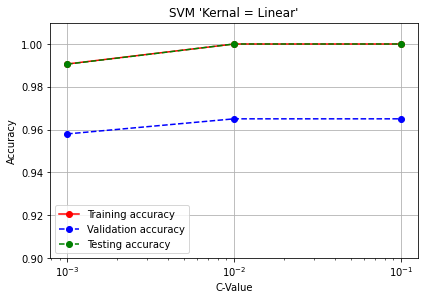

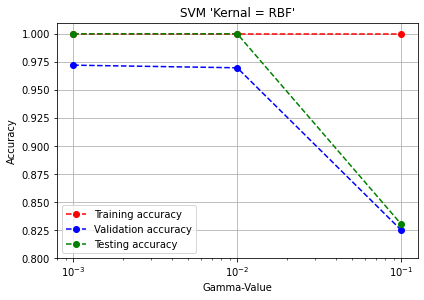

In [27]:
# SVM 'Kernal = Linear' Accuracy Graph
x = [0.001, 0.01, 0.1]
plt.plot(x, SVM_lin_TrAcc, '-ro', label='Training accuracy')
plt.plot(x, SVM_lin_VaAcc, '--bo', label='Validation accuracy')
plt.plot(x, SVM_lin_TsAcc, '--go', label='Testing accuracy')
plt.legend()
plt.xlabel("C-Value")
plt.ylabel("Accuracy")
plt.ylim([0.9, 1.01])
plt.grid()
plt.tight_layout()
plt.xscale('log')
plt.title("SVM 'Kernal = Linear'")
plt.show()

# SVM 'Kernal = RBF' Accuracy Graph
x = [0.001, 0.01, 0.1]
plt.plot(x, SVM_rbf_TrAcc, '--ro', label='Training accuracy')
plt.plot(x, SVM_rbf_VaAcc, '--bo', label='Validation accuracy')
plt.plot(x, SVM_rbf_TsAcc, '--go', label='Testing accuracy')
plt.legend()
plt.xlabel("Gamma-Value")
plt.ylabel("Accuracy")
plt.ylim([0.8, 1.01])
plt.grid()
plt.tight_layout()
plt.xscale('log')
plt.title("SVM 'Kernal = RBF'")
plt.show()


NEURAL NETWORK

In [28]:
# Matthew Lee's Part

### (c)
Report and compare your LR, NB, SVM, and NN classifiers with the best hyperparameter
settings. Summarize what you have observed in the classification accuracy in 𝐹1 measure on
the testing dataset.